# 神经网络的实践

## 小批量梯度下降


## TensorDataset 

TensorDataset在PyTorch中是一个非常有用的数据集类,它可以将tensors打包成数据集以供模型训练。

可以看到TensorDataset将输入的特征和标签打包成了数据集,可以用于后面的模型训练。

它的主要作用有:

- 将特征和标签组合成数据集

- 支持打包多个tensor,如图像、标签等

- 可以索引样例,方便读取

- 兼容 DataLoader,可以批量读取

TensorDataset使得tensor数据的组织和读取非常简洁高效。

## DataLoader

在PyTorch中,DataLoader是用于数据读取的重要类,其主要作用和用法示例如下:

1. 数据读取

DataLoader实现了对Dataset按batch读取,支持多进程读,自动转为GPU等功能:


2. 批处理

可以指定batch大小,将数据分成批进行读取:


3. 随机打乱

设置shuffle=True可以按epoch随机打乱数据:

4. 多进程加速

设置num_workers启动多进程读取数据:

5. 样本采样

可以通过Sampler自定义从数据集中采样样本:

总之,DataLoader提高了数据读取效率,是PyTorch中使用数据集的标准方式。

* for batch_idx, (x,y) in enumerate(batchdata):

In [18]:
from IPython.display import Image
Image(url= "20.png")

In [22]:
Image(url= "22.png", width=600)

In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
features = torch.randn(100, 5) 
labels = torch.randint(0, 10, (100,))

In [4]:
labels

tensor([5, 1, 9, 9, 3, 5, 7, 9, 2, 5, 2, 8, 4, 5, 4, 3, 1, 8, 5, 6, 9, 3, 1, 7,
        4, 2, 4, 4, 4, 1, 7, 9, 4, 0, 6, 9, 2, 5, 1, 2, 8, 0, 6, 9, 4, 7, 4, 3,
        3, 4, 6, 7, 8, 7, 1, 8, 6, 1, 1, 6, 1, 5, 6, 8, 7, 3, 1, 7, 7, 9, 0, 1,
        9, 4, 6, 2, 1, 1, 7, 2, 9, 7, 5, 0, 3, 8, 4, 7, 0, 1, 3, 2, 9, 8, 0, 3,
        5, 5, 5, 7])

In [3]:
dataset=TensorDataset(features, labels)

In [4]:
for i in DataLoader(dataset, batch_size=8):
    print(i)
    break

[tensor([[-9.5280e-01, -3.0774e+00, -5.4249e-01, -3.0317e-03, -1.4348e-01],
        [ 9.2463e-01, -6.3370e-01, -9.1456e-01,  4.8292e-01,  1.3892e-01],
        [-4.6048e-01,  1.3321e+00, -2.5969e-01, -3.4334e-01, -5.5015e-01],
        [ 8.0044e-01,  5.3746e-01, -8.6799e-03, -4.4420e-01,  1.2717e+00],
        [-6.0578e-01, -1.3198e+00,  1.2482e+00, -5.5186e-01, -8.4056e-01],
        [ 2.5463e+00, -9.4506e-01,  6.3811e-02,  6.4624e-02, -7.4463e-02],
        [-8.9326e-01, -2.1968e-01, -2.5476e-01, -7.5230e-01,  2.1866e-01],
        [-1.9377e+00, -9.8148e-01, -4.5201e-01, -9.4173e-01, -5.1840e-01]]), tensor([9, 3, 5, 2, 5, 2, 6, 8])]


In [43]:
# 初始化特征和标签张量
features = torch.randn(100, 5) 
labels = torch.randint(0, 10, (100,))

# 用TensorDataset打包特征和标签
dataset = TensorDataset(features, labels)

# 创建数据加载器
dataloader = DataLoader(dataset, batch_size=8) 

In [9]:
x=torch.tensor([[1.0,2.0,1.5],[3.0,4.0,2.3],[5.0,6.0,1.2]])
z=torch.tensor([0,2,1])

In [62]:
torch.manual_seed(40)
x = torch.rand((500,20),dtype=torch.float32)
y = torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32)

In [11]:
y.unique()

tensor([0., 1., 2.])

In [59]:
#y.view(x.shape[0]).long()

## 回归与二分类的实现

In [61]:
class Model0(nn.Module):
    def __init__(self,in_features=10,out_features=2):
        super(Model0,self).__init__()
        self.h1=nn.Linear(in_features,100,bias=True)
        self.h2=nn.Linear(100,30,bias=True)
        self.out=nn.Linear(30,out_features,bias=True)

    def forward(self, x):
        h1_out=self.h1(x)
        h1_out_r=torch.relu(h1_out)
        h2_out=self.h2(h1_out_r)
        h2_out_r=torch.relu(h2_out)
        out_out=self.out(h2_out_r)
        out_out=torch.softmax(out_out,dim=1)
        return out_out

In [10]:
lr=0.1
gamma=0.5
epochs=5

torch.manual_seed(40)
x = torch.rand((500,20),dtype=torch.float32)
y = torch.randint(low=0,high=2,size=(500,1),dtype=torch.float32)
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=20) 

net=Model0(20,1)
#print(output)
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.MSELoss()
opt=optim.SGD(net.parameters() , lr=lr , momentum = gamma)

for i in range(epochs):
    for x1,y1 in dataloader:
        output=net.forward(x1)
        #y1=y1.view(x1.shape[0])
        #.long()
        loss = criterion(output,y1)#在PyTorch中,有些情况下目标向量(target)需要使用.long()方法转换为长整型tensor(long tensor),
        opt.zero_grad()
        loss.backward()
        opt.step()
        print(loss)

tensor(0.3898, grad_fn=<MseLossBackward0>)
tensor(0.3722, grad_fn=<MseLossBackward0>)
tensor(0.2352, grad_fn=<MseLossBackward0>)
tensor(0.3073, grad_fn=<MseLossBackward0>)
tensor(0.2657, grad_fn=<MseLossBackward0>)
tensor(0.2596, grad_fn=<MseLossBackward0>)
tensor(0.2560, grad_fn=<MseLossBackward0>)
tensor(0.2432, grad_fn=<MseLossBackward0>)
tensor(0.2592, grad_fn=<MseLossBackward0>)
tensor(0.2650, grad_fn=<MseLossBackward0>)
tensor(0.2533, grad_fn=<MseLossBackward0>)
tensor(0.3136, grad_fn=<MseLossBackward0>)
tensor(0.2509, grad_fn=<MseLossBackward0>)
tensor(0.2469, grad_fn=<MseLossBackward0>)
tensor(0.2322, grad_fn=<MseLossBackward0>)
tensor(0.2918, grad_fn=<MseLossBackward0>)
tensor(0.2462, grad_fn=<MseLossBackward0>)
tensor(0.2732, grad_fn=<MseLossBackward0>)
tensor(0.2681, grad_fn=<MseLossBackward0>)
tensor(0.3003, grad_fn=<MseLossBackward0>)
tensor(0.2553, grad_fn=<MseLossBackward0>)
tensor(0.2492, grad_fn=<MseLossBackward0>)
tensor(0.2449, grad_fn=<MseLossBackward0>)
tensor(0.24

## 多分类的实现

* 需要在模型中添加softmax层
* 注意目标向量的形式

In [63]:
#确定数据、确定优先需要设置的值
lr = 0.1
gamma = 0.9
epochs=5
bs=50

torch.manual_seed(420)
X = torch.rand((500,20),dtype=torch.float32) * 100
y = torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32)

data = TensorDataset(X,y)
batchdata = DataLoader(data, batch_size=bs, shuffle = True)

input_ = X.shape[1] #特征的数目
output_ = len(y.unique()) #分类的数目

torch.manual_seed(420)
net = Model0(in_features=input_, out_features=output_)
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(net.parameters() , lr=lr , momentum = gamma) #动量参数


for i in range(epochs):
    for x,y in batchdata:
        y = y.view(x.shape[0]).long()
        z1 = net.forward(x)
        loss = criterion(z1,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        print("epoch:{} , loss:{}".format(i,loss.item()))

epoch:0 , loss:1.1747212409973145
epoch:0 , loss:1.151442289352417
epoch:0 , loss:1.3114445209503174
epoch:0 , loss:1.1314448118209839
epoch:0 , loss:1.2314448356628418
epoch:0 , loss:1.2314448356628418
epoch:0 , loss:1.2114447355270386
epoch:0 , loss:1.2514448165893555
epoch:0 , loss:1.1914448738098145
epoch:0 , loss:1.2514448165893555
epoch:1 , loss:1.2514448165893555
epoch:1 , loss:1.311444878578186
epoch:1 , loss:1.1714447736740112
epoch:1 , loss:1.2114447355270386
epoch:1 , loss:1.2714447975158691
epoch:1 , loss:1.1514447927474976
epoch:1 , loss:1.1714447736740112
epoch:1 , loss:1.1514447927474976
epoch:1 , loss:1.2714447975158691
epoch:1 , loss:1.1714447736740112
epoch:2 , loss:1.2714447975158691
epoch:2 , loss:1.1314448118209839
epoch:2 , loss:1.191444754600525
epoch:2 , loss:1.2714447975158691
epoch:2 , loss:1.2914448976516724
epoch:2 , loss:1.2314448356628418
epoch:2 , loss:1.311444878578186
epoch:2 , loss:1.1714448928833008
epoch:2 , loss:1.2314448356628418
epoch:2 , loss:1.0

# 基于天猫订单数据的简单推荐算法实现

In [20]:
import pandas as pd
r1=pd.read_csv(r"D:\t_alibaba_data3.txt",names=["user","brand","behavr","date"],sep="\t",dtype={"behavr":int})
r1.head()#行为数据要做机器学习是需要进行处理的

,user,brand,behavr,date
0,10944750,13451,0,06/04
1,10944750,13451,2,06/04
2,10944750,13451,2,06/04
3,10944750,13451,0,06/04
4,10944750,13451,0,06/04


In [21]:
b1=r1.groupby(["user","brand","behavr"]).size().unstack(fill_value=0)
b1

behavr           0  1  2  3
user     brand             
19500    143     2  0  0  0
         949     1  0  0  0
         2257    1  0  0  0
         2610   20  0  0  0
         2641    3  0  0  0
...             .. .. .. ..
12417500 24658   1  0  0  0
         24819   0  1  0  0
         28411   0  1  0  0
         29099   0  1  0  0
         29418   1  0  0  0

[57655 rows x 4 columns]

In [22]:
z1=b1[[0,2,3]].values
z1

array([[2, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0]], dtype=int64)

In [24]:
def com1(x):
    if x>1:
        return 1
    else:
        return x
t1=b1[1].map(com1).values

In [26]:
t1

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [27]:
z1

array([[2, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0]], dtype=int64)

In [25]:
features_z1=torch.tensor(z1,dtype=torch.float32)
features_t1= torch.tensor(t1,dtype=torch.float32).unsqueeze(dim=1)

In [26]:
dataset=TensorDataset(features_z1, features_t1)
dataloader = DataLoader(dataset, batch_size=10000)

In [30]:
class Mode_tb(nn.Module):
    def __init__(self,in_features=3,out_features=1):
        super(Mode_tb,self).__init__()
        self.h1=nn.Linear(in_features,10,bias=True)
        self.h2=nn.Linear(10,10,bias=True)
        self.out=nn.Linear(10,out_features,bias=True)

    def forward(self, x):
        h1_out=self.h1(x)
        h1_out_r=torch.relu(h1_out)
        h2_out=self.h2(h1_out_r)
        h2_out_r=torch.relu(h2_out)
        out_out=self.out(h2_out_r)
        #out_out_s=torch.softmax(out_out,dim=1)
        out_out=torch.sigmoid(out_out)
        return out_out

In [45]:
output

tensor([[-0.0510],
        [-0.1054],
        [-0.1054],
        ...,
        [-0.1054],
        [-0.1054],
        [ 0.0024]], grad_fn=<AddmmBackward0>)

In [57]:
y1.unsqueeze(dim=1)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [55]:
lr=0.1
gamma=0.5
epochs=5

net=Mode_tb()
#print(output)
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.BCELoss()
opt=optim.SGD(net.parameters() , lr=lr , momentum = gamma)

for i in range(epochs):
    for x1,y1 in dataloader:
        output=net.forward(x1)
        #y1=y1.view(x1.shape[0])
        #.long()
        
        loss = criterion(output,y1)#在PyTorch中,有些情况下目标向量(target)需要使用.long()方法转换为长整型tensor(long tensor),
        opt.zero_grad()
        loss.backward()
        opt.step()
        #编程把output映射为0和1张量
        output = torch.where(output>0.5,torch.tensor(1),torch.tensor(0))
        #计算准确率
        acc = torch.sum(output==y1)/y1.shape[0]
        #计算f1-score
        tp = torch.sum((output==1) & (y1==1))
        print(loss,acc,tp)


tensor(0.6154, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9204) tensor(0)
tensor(0.6058, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9157) tensor(0)
tensor(0.5727, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9223) tensor(0)
tensor(0.5392, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9280) tensor(0)
tensor(0.5236, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9209) tensor(0)
tensor(0.4956, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9219) tensor(0)
tensor(0.4768, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9204) tensor(0)
tensor(0.4613, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9157) tensor(0)
tensor(0.4407, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9230) tensor(9)
tensor(0.4220, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9288) tensor(11)
tensor(0.4129, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9234) tensor(26)
tensor(0.4015, grad_fn=<BinaryCrossEntropyBackward0>) tensor(0.9236) tensor(18)
tensor(0.3909, grad_fn=<BinaryCrossEntropyBackwar

# 基于真实数据的神经网络模型构建

‌FashionMNIST是一个包含10类服饰分类的数据集，共有7万个不同商品的正面图片。‌ 数据集的大小和格式与原始的MNIST完全一致，包含60000个训练图片和10000个测试图片，每张图片都是28x28的灰度图像‌，像素值在0到255之间，共分为10个类别，分别代表不同的服饰类型‌

In [5]:
mnist = torchvision.datasets.FashionMNIST(root='H:\data\FashionMNIST', train=True, download=True, transform=transforms.ToTensor())

In [6]:
mnist

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: H:\data\FashionMNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

In [19]:
len(mnist[0])

2

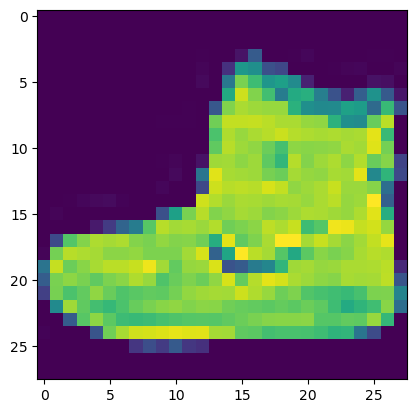

In [7]:
plt.imshow(mnist[0][0].view((28, 28)).numpy())

In [8]:
mnist.targets
mnist.data.shape
#mnist[0][0].view((28, 28))

torch.Size([60000, 28, 28])

In [10]:
#定义神经网路的架构
class Model_mnist(nn.Module):
    def __init__(self,in_features=10,out_features=2):
        super().__init__() 
        #self.normalize = nn.BatchNorm2d(num_features=1)
        self.linear1 = nn.Linear(in_features,128,bias=False)
        self.output = nn.Linear(128,out_features,bias=False)

    def forward(self, x):
        #x = self.normalize(x)
        x = x.view(-1, 28*28)
        #需要对数据的结构进行一个改变，这里的“-1”代表，我不想算，请pytorch帮我计算
        sigma1 = torch.relu(self.linear1(x))
        z2 = self.output(sigma1)
        return z2

In [11]:
lr = 0.15
gamma = 0.1
epochs = 5
bs = 128
batchdata = DataLoader(mnist,batch_size=bs, shuffle = True)
input_ = mnist.data[0].numel()
output_ = len(mnist.targets.unique())

net = Model_mnist(in_features=input_, out_features=output_)
criterion = nn.CrossEntropyLoss() #定义损失函数
opt = optim.SGD(net.parameters(), lr=lr,momentum=gamma) #定义优化算法

In [12]:
for epoch in range(epochs):
    for batch_idx, (x,y) in enumerate(batchdata):
        y = y.view(x.shape[0])
        sigma = net.forward(x)
        loss = criterion(sigma,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        if batch_idx % 100 == 0: print(loss)

tensor(2.3283, grad_fn=<NllLossBackward0>)
tensor(0.7433, grad_fn=<NllLossBackward0>)
tensor(0.4928, grad_fn=<NllLossBackward0>)
tensor(0.5021, grad_fn=<NllLossBackward0>)
tensor(0.4844, grad_fn=<NllLossBackward0>)
tensor(0.4970, grad_fn=<NllLossBackward0>)
tensor(0.4970, grad_fn=<NllLossBackward0>)
tensor(0.4291, grad_fn=<NllLossBackward0>)
tensor(0.5489, grad_fn=<NllLossBackward0>)
tensor(0.4384, grad_fn=<NllLossBackward0>)
tensor(0.3684, grad_fn=<NllLossBackward0>)
tensor(0.5305, grad_fn=<NllLossBackward0>)
tensor(0.4032, grad_fn=<NllLossBackward0>)
tensor(0.4254, grad_fn=<NllLossBackward0>)
tensor(0.4315, grad_fn=<NllLossBackward0>)
tensor(0.4283, grad_fn=<NllLossBackward0>)
tensor(0.3779, grad_fn=<NllLossBackward0>)
tensor(0.4869, grad_fn=<NllLossBackward0>)
tensor(0.3957, grad_fn=<NllLossBackward0>)
tensor(0.3591, grad_fn=<NllLossBackward0>)
tensor(0.3423, grad_fn=<NllLossBackward0>)
tensor(0.3246, grad_fn=<NllLossBackward0>)
tensor(0.2931, grad_fn=<NllLossBackward0>)
tensor(0.36